<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/KMeans_Akshaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Machine_Learning/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


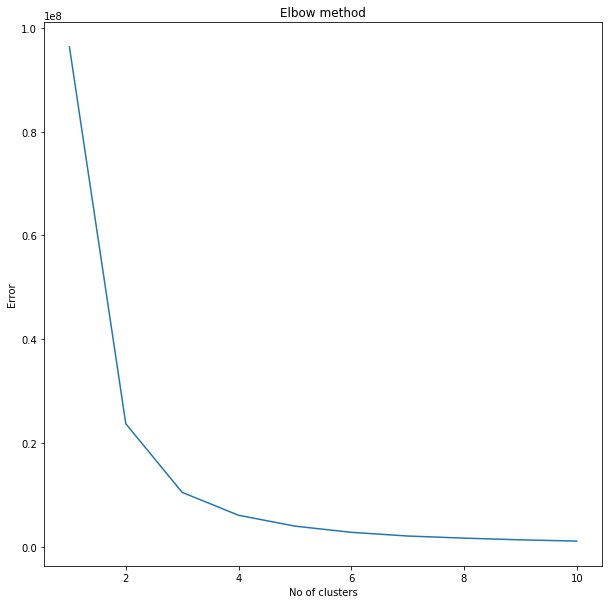

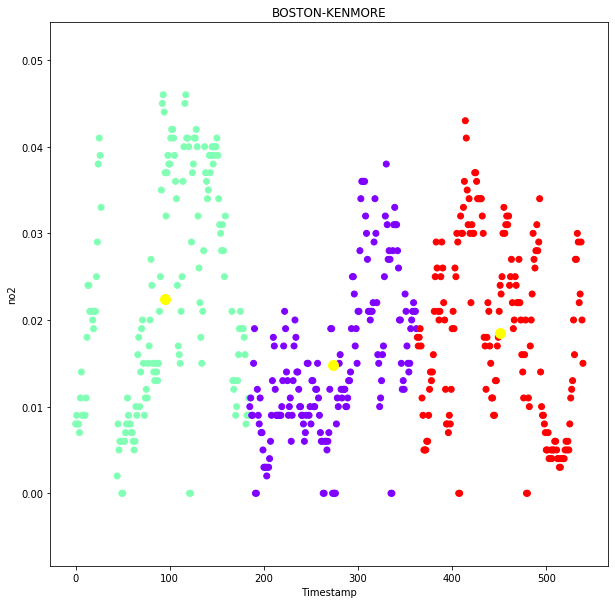

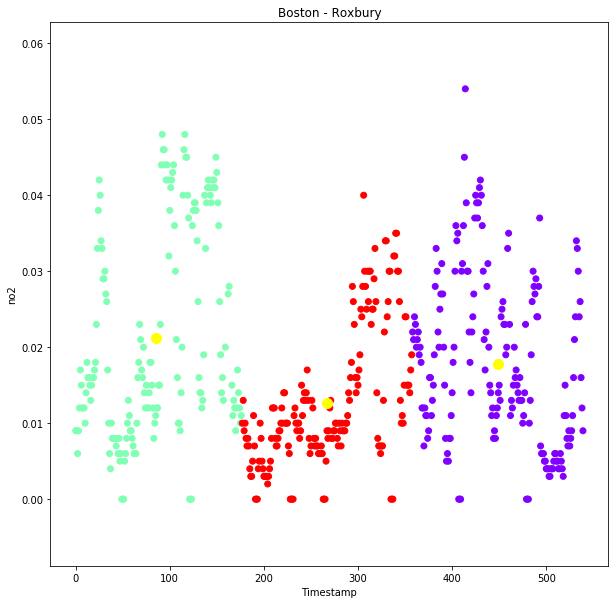

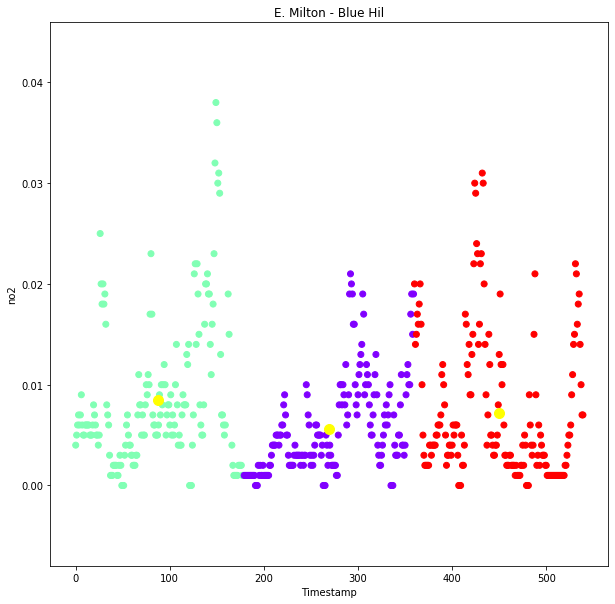

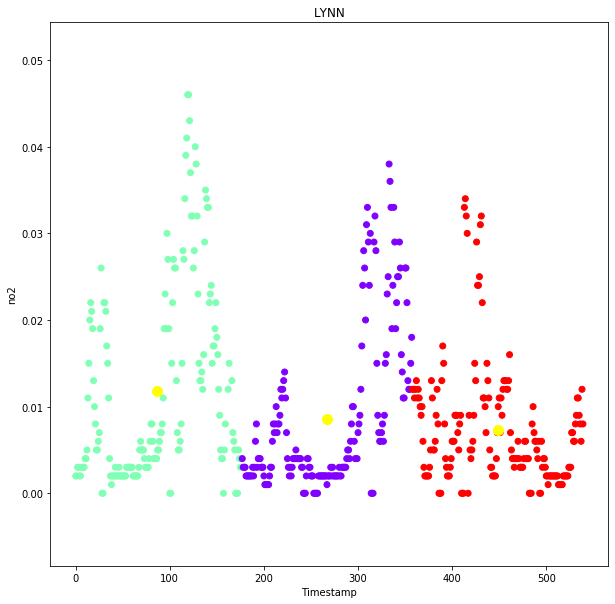

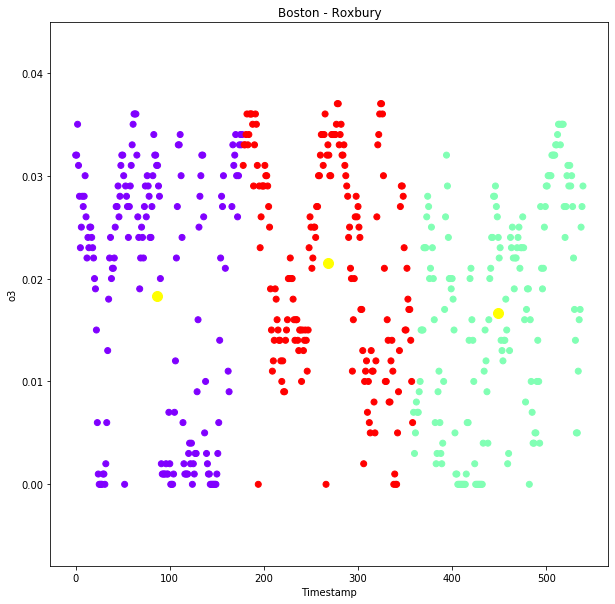

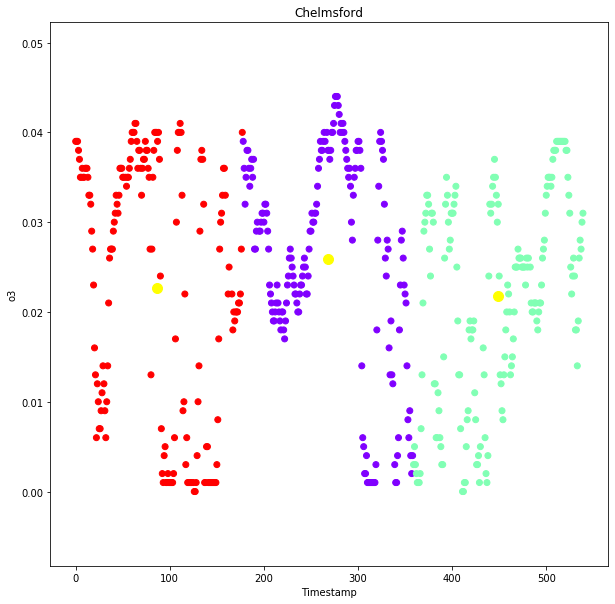

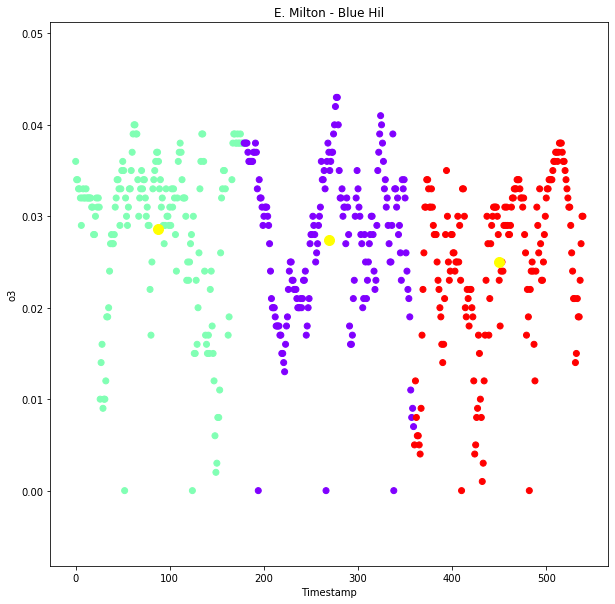

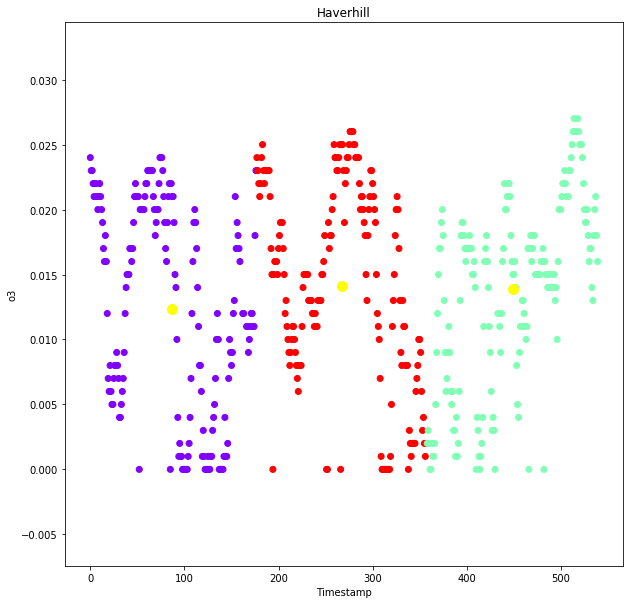

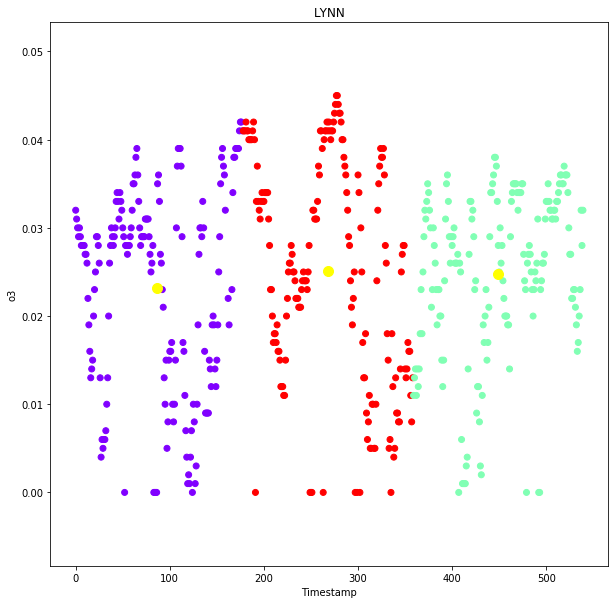

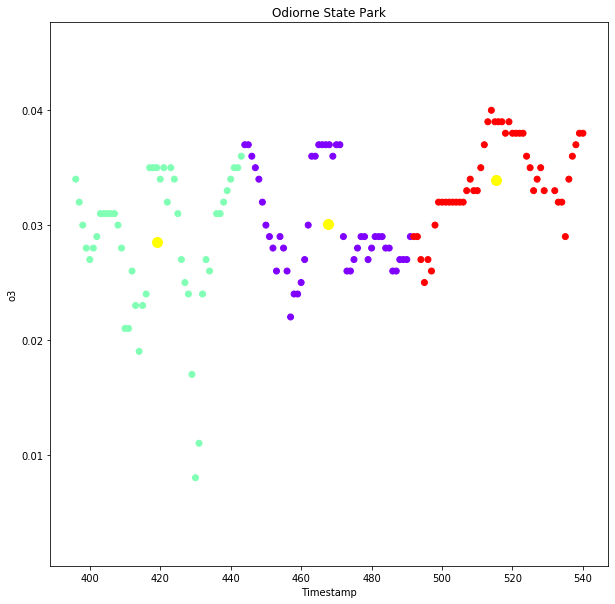

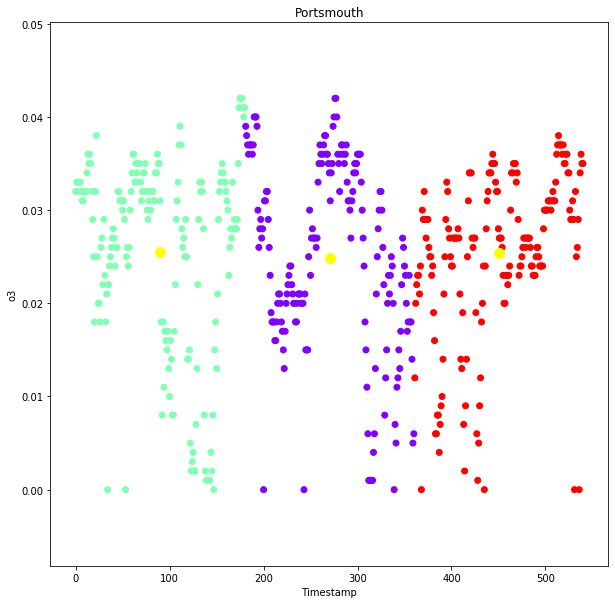

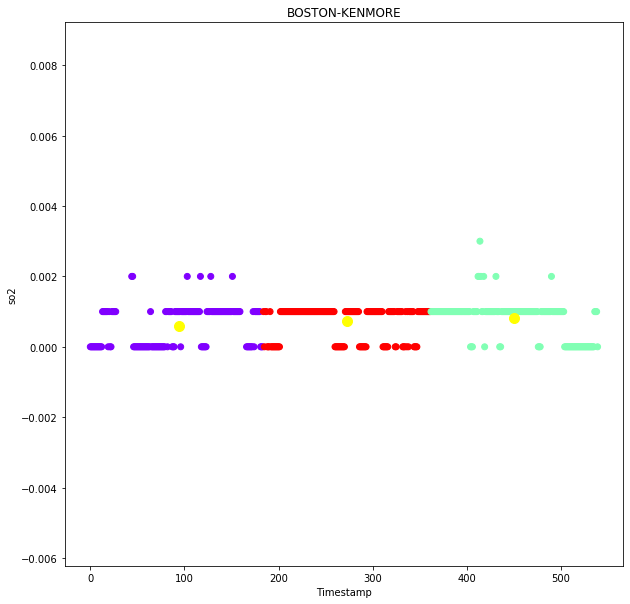

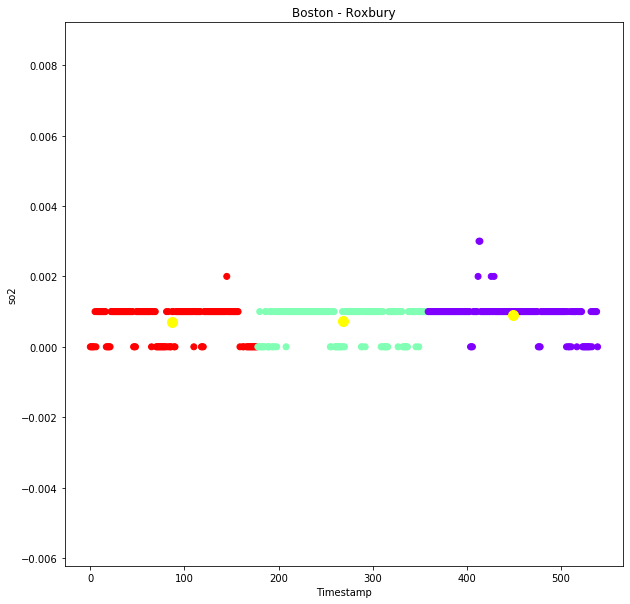

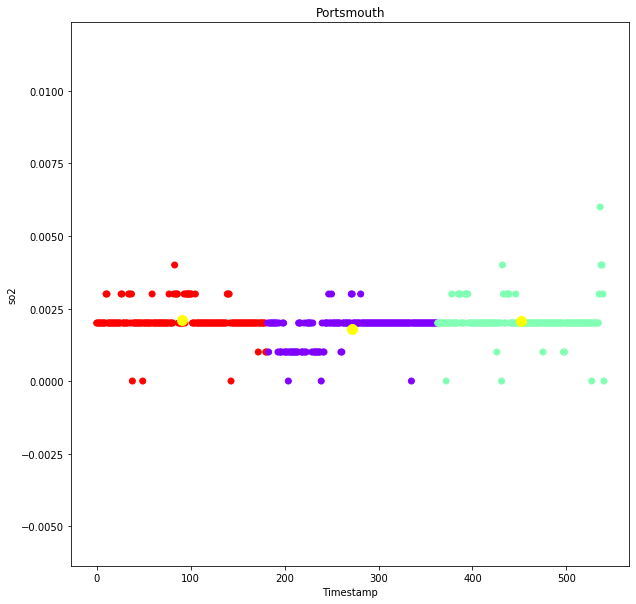

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('/content/gdrive/My Drive/Machine_Learning/AQ_Boston_Cam-Quincy.csv')
df = df.apply(lambda s:s.str.replace('\'', "").str.replace('[', ""))
df.columns = df.columns.str.strip().str.replace('[', '').str.replace(']', '').str.replace('\'','')
df.drop(df.columns[[10,11,12]], axis=1, inplace=True)

# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes

c = df['location'].astype('category')
d = dict(enumerate(c.cat.categories))
df['location'] = c.cat.codes

df['local'] = df['local'].astype('category')
df['local'] = df['local'].cat.codes

table = pd.pivot_table(df, values='value', index=['location', 'local'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
table.reset_index(inplace=True)
table.columns = table.columns.str.strip()

def covert_to_float(param):
    table[param] =  table[param].astype(float)

arr = ['co','no2','o3','pm10','pm25','so2']
for i in arr:
    covert_to_float(i)
table.head(5)

def elbow_method():
    Error =[]
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(table)
        kmeans.fit(table)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(10, 10))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()
    
elbow_method()

def kmeans_plot(location_num, col_number):
    location = table.loc[table['location'] == location_num]
    x = location.iloc[:, [0,1,2,3,4,5,6,7]].values
    kmeans = KMeans(n_clusters=3)
    y_kmeans = kmeans.fit_predict(x)
    plt.figure(figsize=(10, 10))
    plt.scatter(x[:,1], x[:,col_number], c=y_kmeans, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, col_number], s = 100, c = 'yellow', label = 'Centroids')
    title = d[location_num]
    plt.title(title)
    plt.xlabel('Timestamp')
    list = location.columns
    plt.ylabel(list[col_number])
    plt.show()

arr_no2 = [0,1,3,5]
for i in arr_no2:
    kmeans_plot(i, 3) 

arr_o3 = [1,2,3,4,5,6,7]
for i in arr_o3:
    kmeans_plot(i, 4) 

arr_so2 = [0,1,7]
for i in arr_so2:
    kmeans_plot(i, 7) 